In [1]:
# 사진 얼굴감지

import cv2 as cv
import mediapipe as mp

img = cv.imread('C:/Users/user/Downloads/face_image.jpeg') # 이미지 로드

mp_face_detection = mp.solutions.face_detection # 얼굴 감지 모듈
mp_drawing = mp.solutions.drawing_utils # Mediapipe에서 제공하는 그리기 유틸리티 모듈

face_detection = mp_face_detection.FaceDetection(model_selection=1,min_detection_confidence=0.5) # 얼굴감지 모델 설정
res = face_detection.process(cv.cvtColor(img,cv.COLOR_BGR2RGB)) # RGB형식으로 변환 후 얼굴 인지

if not res.detections: # 얼굴 인지 실패
    print('얼굴 검출에 실패 다시 시도')
else:
    for detection in res.detections:
        mp_drawing.draw_detection(img,detection) # 얼굴 주위에 박스 생성
    cv.imshow('Face detection by MediaPipe', img)

cv.waitKey()
cv.destroyAllWindows()

In [2]:
# 영상 동작 인식 - 영상 길이 바 추가 + 멈춤

import cv2 as cv
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

pose = mp_pose.Pose(static_image_mode=False, enable_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

# 영상의 총 프레임 수 얻기
total_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# 프로그레스 바 콜백 함수
def onTrackbarMove(position):
    # 특정 프레임으로 이동
    cap.set(cv.CAP_PROP_POS_FRAMES, position)

cv.namedWindow('MediaPipe pose')
cv.createTrackbar('Progress', 'MediaPipe pose', 0, total_frames - 1, onTrackbarMove)

paused = False  # 영상 일시 정지 여부

while True:
    if not paused:
        ret, frame = cap.read()
        if not ret:
            print('프레임 획득에 실패하여 루프를 나갑니다.')
            break

        res = pose.process(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

        mp_drawing.draw_landmarks(frame, res.pose_landmarks, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=mp_styles.get_default_pose_landmarks_style())

        cv.imshow('MediaPipe pose', frame)

        # 현재 프레임의 위치를 얻어 프로그레스 바를 업데이트
        current_frame = int(cap.get(cv.CAP_PROP_POS_FRAMES))
        cv.setTrackbarPos('Progress', 'MediaPipe pose', current_frame)

    key = cv.waitKey(1)
    if key == ord('s'):
        mp_drawing.plot_landmarks(res.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    elif key == ord(' '):
        paused = not paused  # 키를 누를 때마다 일시 정지/재생 상태를 전환
    elif key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [3]:
# 영상 감정분석

import cv2
import mediapipe as mp

# 미디어파이프의 FaceMesh 및 Holistic 모듈 초기화
mp_face_mesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic

# 감정을 표시할 색상 매핑
EMOTION_COLORS = {
    0: (0, 255, 0),  # Happy (초록색)
    1: (0, 0, 255),  # Sad (빨간색)
    2: (255, 0, 0),  # Angry (파란색)
    3: (255, 255, 0),  # Surprised (노란색)
    4: (0, 255, 255),  # Neutral (하늘색)
}

def main():
    # 웹캠 열기
    cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

    # FaceMesh 및 Holistic 모델 초기화
    face_mesh = mp_face_mesh.FaceMesh()
    holistic = mp_holistic.Holistic()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("웹캠에서 프레임을 읽을 수 없습니다.")
            break

        # 미디어파이프를 사용하여 얼굴 감정 인식
        results = holistic.process(frame)

        # FaceMesh를 사용하여 얼굴 랜드마크 검출
        face_landmarks = results.face_landmarks

        # 얼굴 랜드마크가 감지되면 감정 분석 수행
        if face_landmarks:
            # 여기에서는 단순히 얼굴이 감정을 표시하도록 하였습니다.
            # 실제로는 얼굴 랜드마크를 통해 얼굴 영역을 추출하고 해당 영역에 대해 감정 분석을 수행하는 것이 좋습니다.

            # 감정 추정 (임의로 생성된 값)
            emotion_index = int(results.pose_landmarks.landmark[0].y * 4) % 5

            # 감정에 따라 프레임에 색상 적용
            frame_color = EMOTION_COLORS[emotion_index]

            # 감정을 화면에 표시
            cv2.putText(frame, f'Emotion: {emotion_index}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, frame_color, 2, cv2.LINE_AA)

        # 프레임에 얼굴 랜드마크 및 감정 표시
        cv2.imshow('Emotion Recognition', frame)

        # 종료 조건
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # 리소스 해제
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

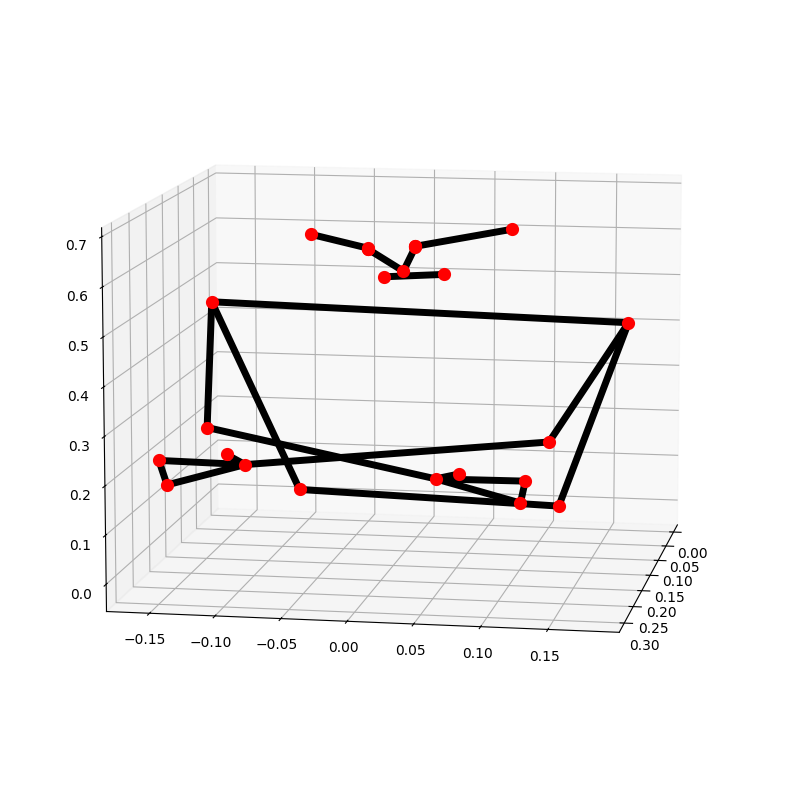

KeyboardInterrupt: 

In [4]:
# 영상 감정분석 + 영상바/멈춤 기능
 
import cv2 as cv
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

# Load the pre-trained emotion recognition model
emotion_model = cv.imread('C:/Users/user/Downloads/model_v6_23.hdf5', cv.IMREAD_GRAYSCALE)

pose = mp_pose.Pose(static_image_mode=False, enable_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load the Haar Cascade for face detection
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

# 영상의 총 프레임 수 얻기
total_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# 프로그레스 바 콜백 함수
def onTrackbarMove(position):
    # 특정 프레임으로 이동
    cap.set(cv.CAP_PROP_POS_FRAMES, position)

cv.namedWindow('MediaPipe pose')
cv.createTrackbar('Progress', 'MediaPipe pose', 0, total_frames - 1, onTrackbarMove)

paused = False  # 영상 일시 정지 여부

while True:
    if not paused:
        ret, frame = cap.read()
        if not ret:
            print('프레임 획득에 실패하여 루프를 나갑니다.')
            break

        res = pose.process(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

        # Face detection
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Extract the region of interest (ROI) for emotion recognition
            roi_gray = gray_frame[y:y + h, x:x + w]
            # Resize the image to the input size of the emotion model
            roi_gray = cv.resize(roi_gray, (48, 48))
            # Perform emotion recognition (you need to replace this with your own emotion recognition logic)
            emotion = "Unknown"  # Replace this with your emotion recognition logic

            # Draw the emotion text on the frame
            cv.putText(frame, f"Emotion: {emotion}", (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        mp_drawing.draw_landmarks(frame, res.pose_landmarks, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=mp_styles.get_default_pose_landmarks_style())

        cv.imshow('MediaPipe pose', frame)

        # 현재 프레임의 위치를 얻어 프로그레스 바를 업데이트
        current_frame = int(cap.get(cv.CAP_PROP_POS_FRAMES))
        cv.setTrackbarPos('Progress', 'MediaPipe pose', current_frame)

    key = cv.waitKey(1)
    if key == ord('s'):
        mp_drawing.plot_landmarks(res.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    elif key == ord(' '):
        paused = not paused  # 키를 누를 때마다 일시 정지/재생 상태를 전환
    elif key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
# 민수님 코드

import cv2
import mediapipe as mp
import time


    
class poseDetector() :
    
    def __init__(self,
                 mode = False,
                 model = 1,
                 smooth = True,
                 enable_s = False,
                 smooth_s = True,
                 detectionCon = 0.5,
                 trcakCon = 0.5) :
        self.mode = mode
        self.model = model
        self.smooth = smooth
        self.enable_s = enable_s
        self.smooth_s = smooth_s
        self.detectionCon = detectionCon
        self.trcakCon = trcakCon
        """
        static_image_mode(mode) / 정적_이미지_모드 :
            Whether to treat the input images as a batch of static and possibly unrelated images, or a video stream.
            입력된 이미지를 정적 이미지와 관련이 없을 수도 있는 이미지의 배치로 처리할지 또는 비디오 스트림으로 처리할지 여부입니다.
            
        model_complexity(model) / 모델_복잡성 :
            Complexity of the pose landmark model: 0, 1 or 2.
            포즈 랜드마크 모델의 복잡도 : 0, 1 또는 2.
            
        smooth_landmarks(smooth) / 부드러운_랜드마크 :
            Whether to filter landmarks across different input images to reduce jitter.
            지터를 줄이기 위해 여러 입력 영상에 걸쳐 랜드마크를 필터링할지 여부.
            
        enable_segmentation(enable_s) / 분할_허용 :
            Whether to predict segmentation mask.
            분할 마스크를 예측할지 여부.

        smooth_segmentation(smooth_s) / 부드러운_분할 :
            Whether to filter segmentation across different input images to reduce jitter.
            지터를 줄이기 위해 여러 입력 영상에 걸쳐 분할을 필터링할지 여부.

        min_detection_confidence(detectionCon) / 최소_탐지_신뢰값 :
            Minimum confidence value ([0.0, 1.0]) for person detection to be considered successful.
            개인 탐지가 성공적인 것으로 간주되기 위한 최소 신뢰 값([0.0, 1.0]).

        min_tracking_confidence(trcakCon) /최소_추적 _신뢰값 :
            Minimum confidence value ([0.0, 1.0]) for the pose landmarks to be considered tracked successfully.
            성공적으로 추적되는 포즈 랜드마크의 최소 신뢰도 값([0.0, 1.0]).
        """
        
        self.mpDraw = mp.solutions.drawing_utils
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode, self.model, self.smooth, self.enable_s, self.smooth_s, self.detectionCon, self.trcakCon)
        
        
    def findPose(self, img, draw = True) :
        """
        Input
            1) img :
                이미지
            2) draw :
                True or False
        Output
            1) img :
                cv2의 BGR을 mediapipe가 인식 가능하도록 RGB로 변환 후 완료된 이미지를 모델로 보냄,
                draw 여부에 따라 랜드마크 점 표시 및 점을 선으로 연결
        """
        # cv2의 BGR을 mediapipe가 인식 가능하도록 RGB로 변환
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 변환 완료된 이미지를 모델로 보냄
        self.results = self.pose.process(imgRGB)
        
        # 랜드마크 점 표시 및 점을 선으로 연결
        if self.results.pose_landmarks :
            if draw :
                self.mpDraw.draw_landmarks(img, self.results.pose_landmarks, self.mpPose.POSE_CONNECTIONS)
        
        return img
        
    def findPosition(self, img, draw = True) :
        """
        Input
            1) img :
                이미지
            2) draw :
                True or False
        Output
            1) lmList (list) :
                랜드마크 객체 내에서 정보를 추출 하고,
                x값과 y값을 각각 너비와 높이와 곱한 수를 'int'로 변환 후,
                각 포인트 0 부터 32까지의 값을 리스트로 반환
        """
        lmList = []
        # 랜드마크 객체 내에서 정보 추출
        if self.results.pose_landmarks :
            for id, lm in enumerate(self.results.pose_landmarks.landmark) :
                # 높이, 너비, 채널
                h, w, c = img.shape
                # print(id, lm)
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmList.append([id, cx, cy])
                if draw :
                    # 표시할 이미지, 점 좌표, 크기, 색
                    cv2.circle(img, (cx, cy), 1, (255, 0, 0), cv2.FILLED)
        
        return lmList


def main() :
    cap = cv2. VideoCapture("C:/Users/user/Downloads/lecture.mp4")
    pTime = 0
    detector = poseDetector()
    while True :
        # 영상 읽기
        success, img = cap.read()
        # 각 함수 실행
        img = detector.findPose(img)
        lmList = detector.findPosition(img, draw = False)
        # print(lmList)
        
        # 강조하고 싶은 포인트 (IndexError: list index out of range 에러 발생)
        point_1 = 0
        point_2 = 15
        point_3 = 16
        if len(lmList) != 0 :
            print(lmList[point_1], lmList[point_2], lmList[point_3])
            cv2.circle(img, (lmList[point_1][1], lmList[point_1][2]), 7, (0, 255, 0), cv2.FILLED)
            cv2.circle(img, (lmList[point_2][1], lmList[point_2][2]), 7, (255, 0, 0), cv2.FILLED)
            cv2.circle(img, (lmList[point_3][1], lmList[point_3][2]), 7, (255, 0, 0), cv2.FILLED)
    
        # 영상에 프레임 표시
        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime
        
        cv2.putText(img, str(int(fps)), (70, 50), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 3)
        
        # 영상 보여주기
        cv2.imshow("Image", img)
        
        # 1 밀리세컨드 만큼 딜레이
        cv2.waitKey(1)


if __name__ == "__main__" :
    main()

# 얼굴
# 0 - nose / 코
# 1 - left eye (inner) / 왼쪽 눈 (안)
# 2 - left eye / 왼쪽 눈
# 3 - left eye (outer) / 왼쪽 눈 (밖)
# 4 - right eye (inner) / 오른쪽 눈 (안)
# 5 - right eye / 오른쪽 눈 
# 6 - right eye (outer) / 오른쪽 눈 (밖)
# 7 - left ear / 왼쪽 귀
# 8 - right ear / 오른쪽 귀
# 9 - mouth (left) / 입 (왼쪽)
# 10 - mouth (right) / 입 (오른쪽)

# 몸
# 11 - left shoulder / 왼쪽 어깨
# 12 - right shoulder / 오른쪽 어깨
# 13 - left elbow / 왼쪽 팔꿈치
# 14 - right elbow / 오른쪽 팔꿈치
# 15 - left wrist / 왼쪽 손목
# 16 - right wrist / 오른쪽 손목
# 17 - left pinky / 왼쪽 새끼손가락
# 18 - right pinky / 오른쪽 새끼손가락
# 19 - left index / 왼쪽 검지손가락
# 20 - right index / 오른쪽 검지손가락
# 21 - left thumb / 왼쪽 엄지손가락
# 22 - right thumb / 오른쪽 엄지손가락
# 23 - left hip / 왼쪽 엉덩이
# 24 - right hip / 오른쪽 엉덩이
# 25 - left knee / 왼쪽 무릎
# 26 - right knee / 오른쪽 무릎
# 27 - left ankle / 왼쪽 발목
# 28 - right ankle / 오른쪽 발목
# 29 - left heel / 왼쪽 발뒤꿈치
# 30 - right heel / 오른쪽 발뒤꿈치
# 31 - left foot index / 왼쪽 발끝
# 32 - right foot index / 오른쪽 발끝

[0, -17, 73] [15, 45, 206] [16, 11, 208]
[0, 0, 70] [15, 33, 208] [16, 24, 207]
[0, 19, 69] [15, 5, 210] [16, 36, 206]
[0, 34, 69] [15, 10, 211] [16, 49, 206]
[0, 47, 68] [15, 17, 212] [16, 63, 206]
[0, 59, 68] [15, 24, 211] [16, 74, 206]
[0, 68, 68] [15, 36, 211] [16, 80, 207]
[0, 77, 67] [15, 45, 211] [16, 88, 209]
[0, 82, 67] [15, 50, 209] [16, 97, 209]
[0, 86, 67] [15, 52, 209] [16, 100, 208]
[0, 89, 67] [15, 56, 209] [16, 101, 208]
[0, 90, 67] [15, 61, 210] [16, 99, 208]
[0, 99, 65] [15, 63, 210] [16, 98, 210]
[0, 96, 66] [15, 63, 210] [16, 93, 210]
[0, 93, 65] [15, 63, 211] [16, 96, 210]
[0, 91, 65] [15, 62, 210] [16, 102, 210]
[0, 90, 65] [15, 60, 208] [16, 107, 211]
[0, 90, 65] [15, 60, 206] [16, 109, 211]
[0, 91, 65] [15, 60, 206] [16, 107, 211]
[0, 91, 65] [15, 60, 207] [16, 105, 211]
[0, 91, 65] [15, 60, 207] [16, 104, 211]
[0, 91, 65] [15, 60, 207] [16, 104, 211]
[0, 91, 65] [15, 60, 207] [16, 104, 211]
[0, 91, 65] [15, 60, 207] [16, 104, 211]
[0, 91, 65] [15, 60, 207] [16,

KeyboardInterrupt: 

: 

In [3]:
# 얼굴 랜드마크 - 좀 징그러움

import cv2 as cv
import mediapipe as mp

# 미디어파이프의 Face 모듈 초기화
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# 미디어파이프 Face 메소드 생성
face_mesh = mp_face_mesh.FaceMesh()

# OpenCV를 사용하여 동영상 읽기
cap = cv.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # BGR 이미지를 RGB로 변환
    rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    # 랜드마크 추출
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(frame, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS)

    cv.imshow("Face Landmarks", frame)

    if cv.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

cap.release()
cv.destroyAllWindows()

In [1]:
import tensorflow as tf

# .h5 모델 경로
h5_model_path = 'C:/Users/user/Downloads/emotion_recognition/emotion_model.h5'

# .h5 모델 로드
tf_model = tf.keras.models.load_model(h5_model_path)

# TensorFlow Lite 모델로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# TensorFlow Lite 모델 저장
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpe3q9u5o5\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpe3q9u5o5\assets


In [1]:
# 감정분석 모델을 사용해서 영상 감정분석하기

# !pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 영상 전처리 (모델에 맞게)
    input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
    input_frame = np.expand_dims(input_frame, axis=0)

    # 모델 입력 설정
    interpreter.set_tensor(input_details[0]['index'], input_frame.astype(np.float32))

    # 모델 추론
    interpreter.invoke()

    # 모델 출력 가져오기
    output_data = interpreter.get_tensor(output_details[0]['index'])
    emotion_label = EMOTIONS[np.argmax(output_data)]

    # 화면에 감정 표시
    cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 출력
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 1 for dimension 3 of input 0.

In [7]:
# 감정분석 모델을 사용해서 영상 감정분석하기 - 수정

import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 영상 전처리 (모델에 맞게)
    input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
    input_frame = np.expand_dims(input_frame, axis=0)

    # 모델 입력 설정
    interpreter.set_tensor(input_details[0]['index'], input_frame.astype(np.float32))

    # 모델 추론
    interpreter.invoke()

    # 모델 출력 가져오기
    output_data = interpreter.get_tensor(output_details[0]['index'])
    emotion_label = EMOTIONS[np.argmax(output_data)]

    # 화면에 감정 표시
    cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 출력
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 1 for dimension 3 of input 0.

In [8]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 영상 전처리 (모델에 맞게)
    input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

    # 입력 이미지 채널 수 확인
    if input_details[0]['shape'][3] == 1:  # 모델이 grayscale 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
        input_frame = np.expand_dims(input_frame, axis=-1)  # 채널 차원 추가
    elif input_details[0]['shape'][3] == 3:  # 모델이 컬러 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

    input_frame = input_frame.astype(np.float32) / 255.0  # 0~1 사이로 정규화
    input_frame = np.expand_dims(input_frame, axis=0)

    # 모델 입력 설정
    interpreter.set_tensor(input_details[0]['index'], input_frame)

    # 모델 추론
    interpreter.invoke()

    # 모델 출력 가져오기
    output_data = interpreter.get_tensor(output_details[0]['index'])
    emotion_label = EMOTIONS[np.argmax(output_data)]

    # 화면에 감정 표시
    cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 출력
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

# 영상 정보
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
video_duration = total_frames / fps

# 초기 설정
current_frame = 0

# 영상길이 바 생성
cv2.namedWindow('Emotion Detection')
cv2.createTrackbar('Position', 'Emotion Detection', 0, total_frames, lambda x: None)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 영상 전처리 (모델에 맞게)
    input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

    # 입력 이미지 채널 수 확인
    if input_details[0]['shape'][3] == 1:  # 모델이 grayscale 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
        input_frame = np.expand_dims(input_frame, axis=-1)  # 채널 차원 추가
    elif input_details[0]['shape'][3] == 3:  # 모델이 컬러 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

    input_frame = input_frame.astype(np.float32) / 255.0  # 0~1 사이로 정규화
    input_frame = np.expand_dims(input_frame, axis=0)

    # 모델 입력 설정
    interpreter.set_tensor(input_details[0]['index'], input_frame)

    # 모델 추론
    interpreter.invoke()

    # 모델 출력 가져오기
    output_data = interpreter.get_tensor(output_details[0]['index'])
    emotion_label = EMOTIONS[np.argmax(output_data)]

    # 화면에 감정 표시
    cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 영상길이 바 업데이트
    cv2.setTrackbarPos('Position', 'Emotion Detection', current_frame)

    # 화면에 출력
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # 트랙바에서 현재 프레임 가져오기
    current_frame = cv2.getTrackbarPos('Position', 'Emotion Detection')

    # 트랙바 조작에 따라 동영상 위치 이동
    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Emotion Detection' in function 'cvGetTrackbarPos'


In [12]:
# 수정한 코드

import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 영상 전처리 (모델에 맞게)
    input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

    # 입력 이미지 채널 수 확인
    if input_details[0]['shape'][3] == 1:  # 모델이 grayscale 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
        input_frame = np.expand_dims(input_frame, axis=-1)  # 채널 차원 추가
    elif input_details[0]['shape'][3] == 3:  # 모델이 컬러 이미지를 예상하는 경우
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

    input_frame = input_frame.astype(np.float32) / 255.0  # 0~1 사이로 정규화
    input_frame = np.expand_dims(input_frame, axis=0)

    # 모델 입력 설정
    interpreter.set_tensor(input_details[0]['index'], input_frame)

    # 모델 추론
    interpreter.invoke()

    # 모델 출력 가져오기
    output_data = interpreter.get_tensor(output_details[0]['index'])
    emotion_label = EMOTIONS[np.argmax(output_data)]

    # 화면에 감정 표시
    cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 출력
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

# 일시 정지 여부 변수
paused = False

while cap.isOpened():
    if not paused:
        ret, frame = cap.read()
        if not ret:
            break

        # 영상 전처리 (모델에 맞게)
        input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

        # 입력 이미지 채널 수 확인
        if input_details[0]['shape'][3] == 1:  # 모델이 grayscale 이미지를 예상하는 경우
            input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
            input_frame = np.expand_dims(input_frame, axis=-1)  # 채널 차원 추가
        elif input_details[0]['shape'][3] == 3:  # 모델이 컬러 이미지를 예상하는 경우
            input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        input_frame = input_frame.astype(np.float32) / 255.0  # 0~1 사이로 정규화
        input_frame = np.expand_dims(input_frame, axis=0)

        # 모델 입력 설정
        interpreter.set_tensor(input_details[0]['index'], input_frame)

        # 모델 추론
        interpreter.invoke()

        # 모델 출력 가져오기
        output_data = interpreter.get_tensor(output_details[0]['index'])
        emotion_label = EMOTIONS[np.argmax(output_data)]

        # 화면에 감정 표시
        cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # 화면에 출력
        cv2.imshow('Emotion Detection', frame)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break
    elif key == ord('p'):  # 'p' 키를 누르면 일시 정지/재개
        paused = not paused

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# TensorFlow Lite 모델 경로
tflite_model_path = 'C:/Users/user/Downloads/emotion_model.tflite'

# TensorFlow Lite 모델 로드
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 모델 입력 및 출력 텐서 인덱스
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 감정 클래스
EMOTIONS = ["Angry", "Disgusted", "Fearful", "Happy", "Sad", "Surprised", "Neutral"]

# 웹캠 초기화
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

# 일시 정지 여부 변수
paused = False

# 영상 총 프레임 수
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 트랙바 콜백 함수
def on_trackbar_change(pos):
    cap.set(cv2.CAP_PROP_POS_FRAMES, pos)

# 윈도우 생성 및 트랙바 추가
cv2.namedWindow('Emotion Detection')
cv2.createTrackbar('Progress', 'Emotion Detection', 0, total_frames, on_trackbar_change)

while cap.isOpened():
    if not paused:
        ret, frame = cap.read()
        if not ret:
            break

        # 영상 전처리 (모델에 맞게)
        input_frame = cv2.resize(frame, (input_details[0]['shape'][2], input_details[0]['shape'][1]))

        # 입력 이미지 채널 수 확인
        if input_details[0]['shape'][3] == 1:  # 모델이 grayscale 이미지를 예상하는 경우
            input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2GRAY)
            input_frame = np.expand_dims(input_frame, axis=-1)  # 채널 차원 추가
        elif input_details[0]['shape'][3] == 3:  # 모델이 컬러 이미지를 예상하는 경우
            input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        input_frame = input_frame.astype(np.float32) / 255.0  # 0~1 사이로 정규화
        input_frame = np.expand_dims(input_frame, axis=0)

        # 모델 입력 설정
        interpreter.set_tensor(input_details[0]['index'], input_frame)

        # 모델 추론
        interpreter.invoke()

        # 모델 출력 가져오기
        output_data = interpreter.get_tensor(output_details[0]['index'])
        emotion_label = EMOTIONS[np.argmax(output_data)]

        # 화면에 감정 표시
        cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # 화면에 출력
        cv2.imshow('Emotion Detection', frame)

        # 트랙바 업데이트
        current_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        cv2.setTrackbarPos('Progress', 'Emotion Detection', current_frame)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break
    elif key == ord('p'):  # 'p' 키를 누르면 일시 정지/재개
        paused = not paused

cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import mediapipe as mp

# 미디어파이프 초기화
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.3)

# 웹캠 열기
cap = cv2.VideoCapture('C:/Users/user/Downloads/lecture.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지를 RGB로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 얼굴 감지 수행
    results = face_detection.process(rgb_frame)

    # 감지된 얼굴에 감정 표시
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(frame, bbox, (0, 255, 0), 2)

    # 화면에 표시
    cv2.imshow('Emotion Detection', frame)

    # 종료 키 (q)를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 종료
cap.release()
cv2.destroyAllWindows()